In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from IPython.display import Image 
%matplotlib inline 

In [2]:
img=r"C:\Users\asus\OneDrive\Documents\Pictures\Screenshots\Screenshot 2025-02-18 221955.png"

[[225 225 225 ... 187 187 187]
 [226 226 225 ... 188 187 187]
 [226 226 225 ... 187 187 187]
 ...
 [239 239 239 ... 207 206 205]
 [239 239 239 ... 207 209 206]
 [239 239 239 ... 207 209 206]]


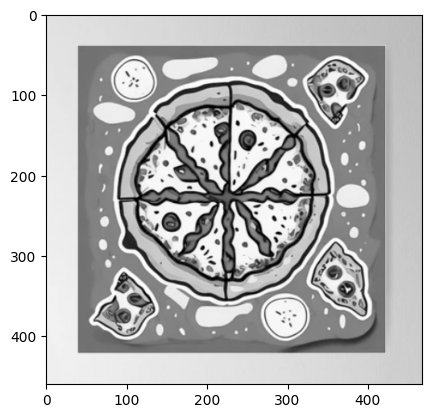

In [3]:
gr_img=cv2.imread(img,0)
print(gr_img)
plt.imshow(gr_img,cmap="gray")

In [4]:
print(gr_img[200,200])
print(gr_img[380,200])

21
239


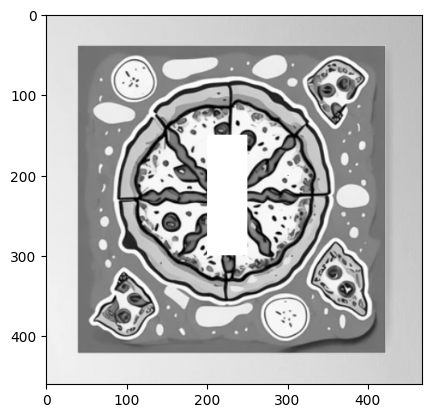

In [5]:
gr1=gr_img.copy()
gr1[200,300]=0
gr1[150:300,200:250]=255
plt.imshow(gr1,cmap='gray')

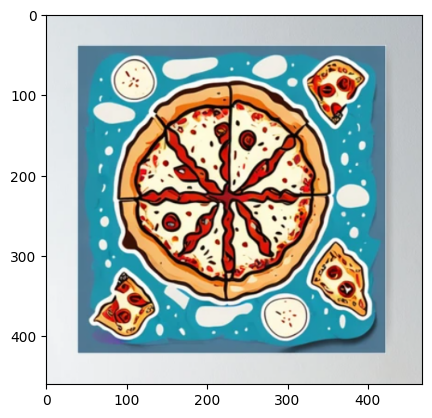

In [6]:
img_bgr=cv2.imread(img,cv2.IMREAD_COLOR)
img_rgb=img_bgr[:,:,::-1]
plt.imshow(img_rgb)

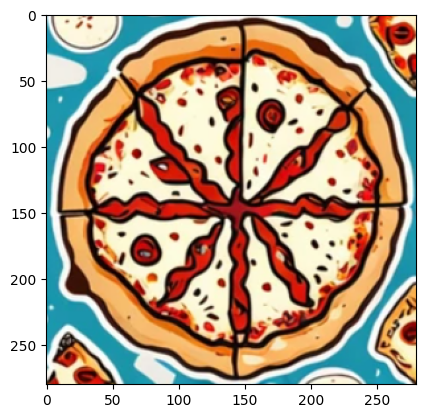

In [7]:
img_c=img_rgb[80:360,80:360]
plt.imshow(img_c)

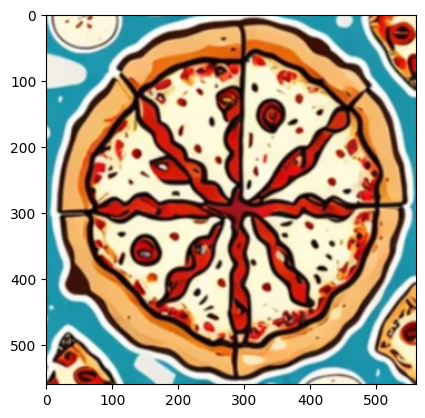

In [8]:
img_r=cv2.resize(img_c,None,fx=2,fy=2)
plt.imshow(img_r)

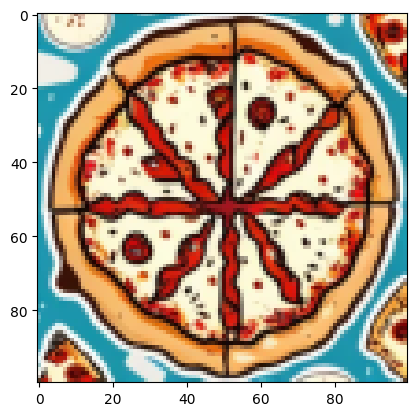

In [9]:
width=100
height=100
dim=(width,height)
img_cr=cv2.resize(img_c,dim,interpolation=cv2.INTER_AREA)
plt.imshow(img_cr)

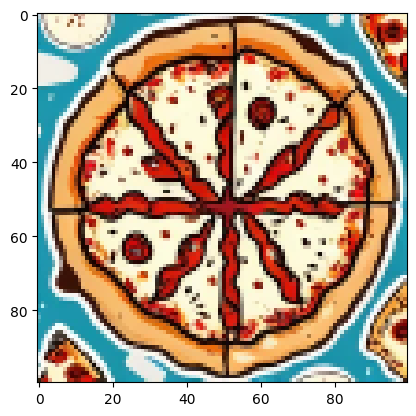

In [10]:
d_width=100
aspect_ratio=d_width/img_c.shape[1]
dim=(d_width,int(img_c.shape[0]*aspect_ratio))
img_cr1=cv2.resize(img_c,dim,cv2.INTER_AREA)
plt.imshow(img_cr1)

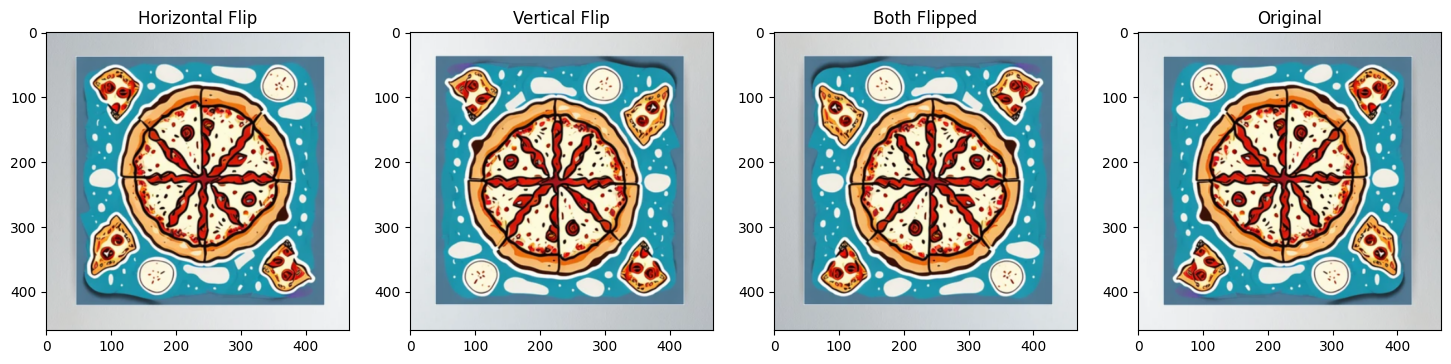

In [11]:
img_rgb_flipped_horz = cv2.flip(img_rgb, 1)
img_rgb_flipped_vert = cv2.flip(img_rgb, 0)
img_rgb_flipped_both = cv2.flip(img_rgb, -1)
plt.figure(figsize=(18, 5))
plt.subplot(141);plt.imshow(img_rgb_flipped_horz);plt.title("Horizontal Flip");
plt.subplot(142);plt.imshow(img_rgb_flipped_vert);plt.title("Vertical Flip");
plt.subplot(143);plt.imshow(img_rgb_flipped_both);plt.title("Both Flipped");
plt.subplot(144);plt.imshow(img_rgb);plt.title("Original");

In [12]:
img_c=img_c[:,:,::-1]
cv2.imwrite("cropped_image.png",img_c)

True

## Annotating Images
The below code will cover how to annotate images using OpenCV

Draw lines
Draw circles
Draw rectangles
Add text

In [13]:
img2=img_rgb.copy()

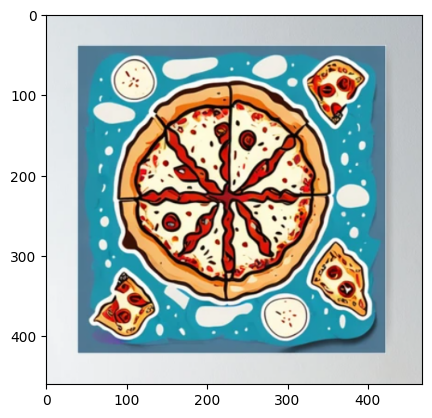

In [14]:
plt.imshow(img2)

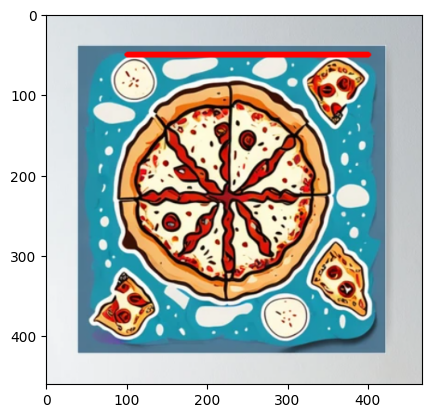

In [15]:
img2=cv2.line(img2,(100,50),(400,50),(255,0,0),thickness=5,lineType=cv2.LINE_AA)
plt.imshow(img2)


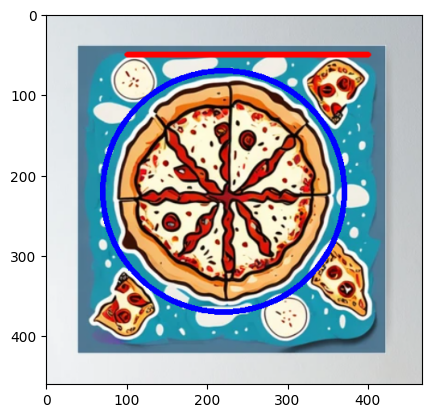

In [16]:
cv2.circle(img2,(220,220),150,(0,0,255),5,lineType=cv2.LINE_8)
plt.imshow(img2)

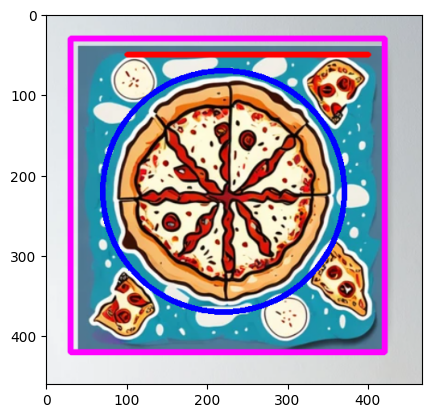

In [17]:
cv2.rectangle(img2,(30,30),(420,420),(255,0,255),5,cv2.LINE_AA)
plt.imshow(img2)

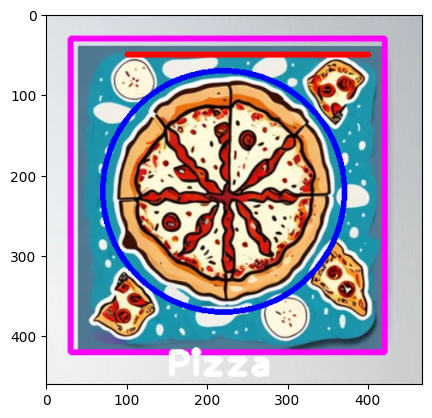

In [18]:
cv2.putText(img2,"Pizza",(150,450),cv2.FONT_HERSHEY_PLAIN,3,(255,255,255),5,cv2.LINE_AA)
plt.imshow(img2)

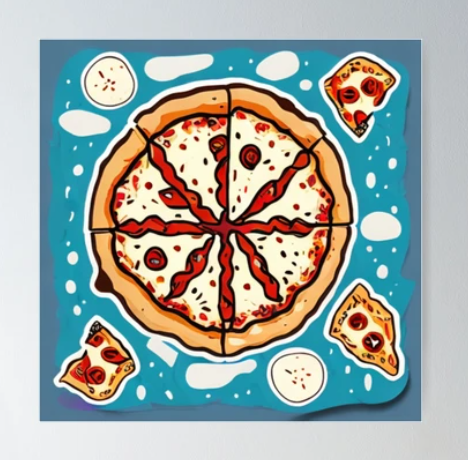

In [19]:
Image(filename=img)

## Addition or Brightness
We increase or decrese the intensity value by simple addition and subtraction 

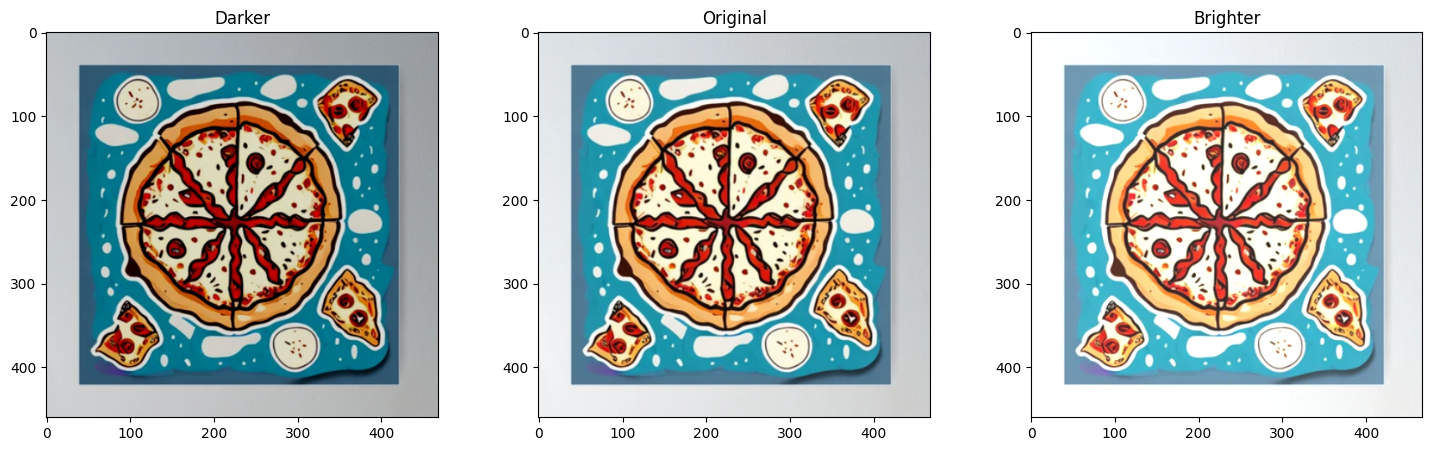

In [20]:
matrix = np.ones(img_rgb.shape, dtype="uint8") * 33
img_rgb_bright=cv2.add(img_rgb,matrix)
img_rgb_dark=cv2.subtract(img_rgb,matrix)

plt.figure(figsize=[18, 5])
plt.subplot(131); plt.imshow(img_rgb_dark);  plt.title("Darker");
plt.subplot(132); plt.imshow(img_rgb);         plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_bright);plt.title("Brighter");


## Multiplication or Contrast
Just like addition can result in brightness change, multiplication can be used to improve the contrast of the image.

Contrast is the difference in the intensity values of the pixels of an image. Multiplying the intensity values with a constant can make the difference larger or smaller ( if multiplying factor is < 1 ).

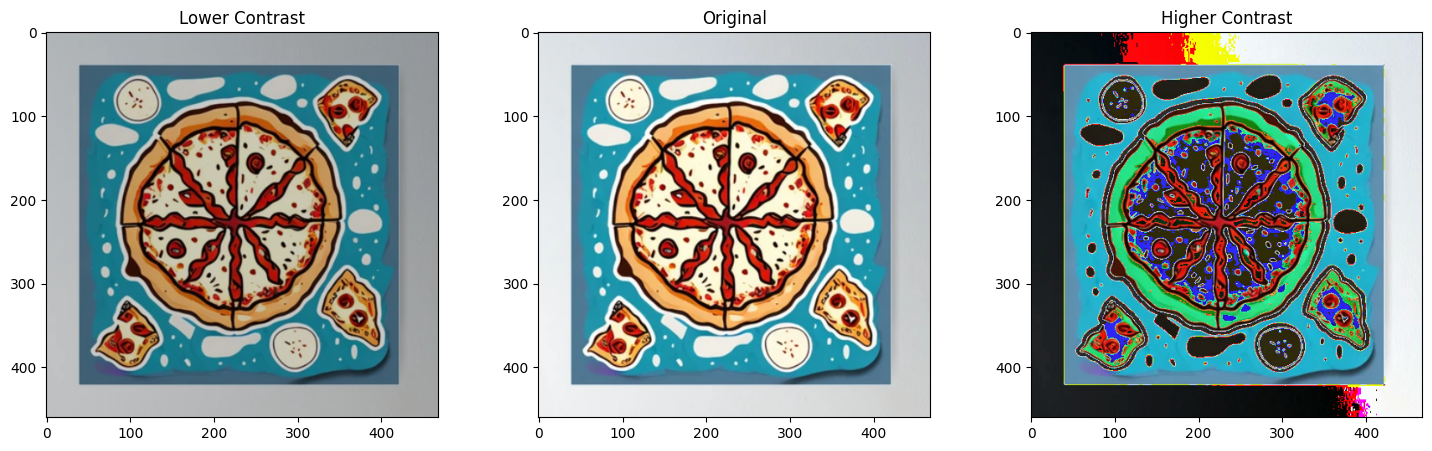

In [21]:
matrix1 = np.ones(img_rgb.shape) * 0.8
matrix2 = np.ones(img_rgb.shape) * 1.2

img_rgb_darker   = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_brighter = np.uint8(cv2.multiply(matrix2,np.float64(img_rgb)))
# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_darker);  plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(img_rgb);         plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_brighter);plt.title("Higher Contrast");

## Handling Overflow using np.clip
We can see the weird colors in some areas of the image after multiplication especially in the brighter image 

The issue is that after multiplying, the values which are already high, are becoming greater than 255. Thus, the overflow issue. We can oversome this using np.clip



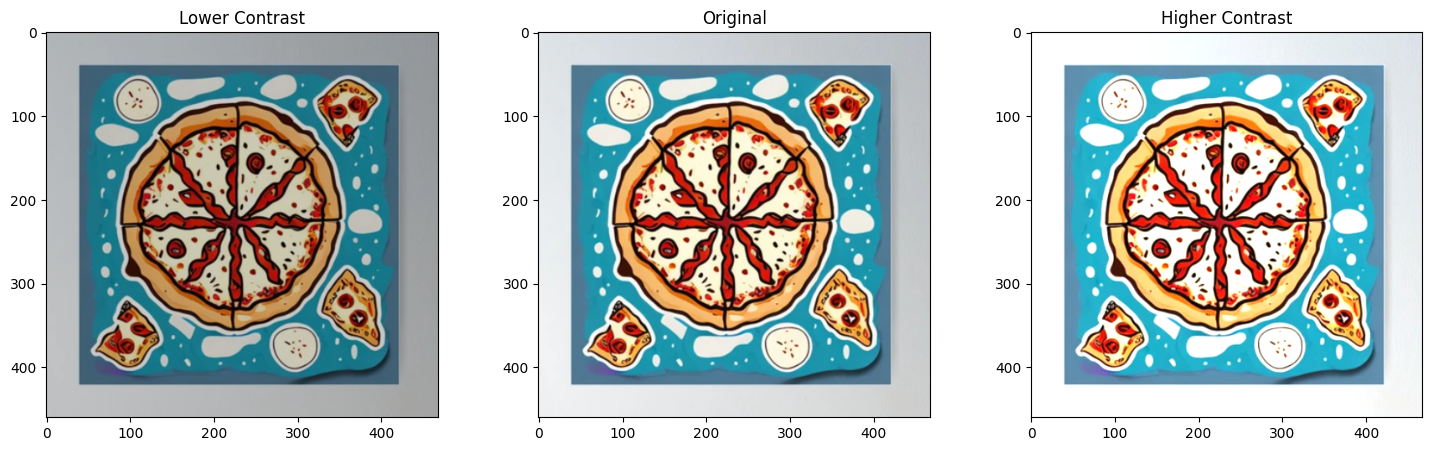

In [22]:
matrix1 = np.ones(img_rgb.shape) * 0.8
matrix2 = np.ones(img_rgb.shape) * 1.2

img_rgb_darker   = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_brighter = np.uint8(np.clip(cv2.multiply(matrix2,np.float64(img_rgb)),0,255))
# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_darker);  plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(img_rgb);         plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_brighter);plt.title("Higher Contrast");

## Image Thresholding
Binary Images have a lot of use cases in Image Processing. One of the most common use cases is that of creating masks. Image Masks allow us to process on specific parts of an image keeping the other parts intact. Image Thresholding is used to create Binary Images from grayscale images. You can use different thresholds to create different binary images from the same original image.

## Function Syntax for normal threshold 
retval, dst = cv2.threshold( src, thresh, maxval, type[, dst] )
dst: The output array of the same size and type and the same number of channels as src.

#### The function has 4 required arguments:

src: input array (multiple-channel, 8-bit or 32-bit floating point).

thresh: threshold value.

maxval: maximum value to use with the THRESH_BINARY and THRESH_BINARY_INV thresholding types.

type: thresholding type (see ThresholdTypes).

## Function Syntax for adaptove threshold 
dst = cv.adaptiveThreshold( src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst] )
dst Destination image of the same size and the same type as src.

#### The function has 6 required arguments:

1.src: Source 8-bit single-channel image.

2.maxValue: Non-zero value assigned to the pixels for which the condition is satisfied

3.adaptiveMethod: Adaptive thresholding algorithm to use, see AdaptiveThresholdTypes. The BORDER_REPLICATE | BORDER_ISOLATED is used to process boundaries.

4.thresholdType: Thresholding type that must be either THRESH_BINARY or THRESH_BINARY_INV, see ThresholdTypes.

5.blockSize: Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.

6.C: Constant subtracted from the mean or weighted mean (see the details below). Normally, it is positive but may be zero or negative as well.

(460, 468)


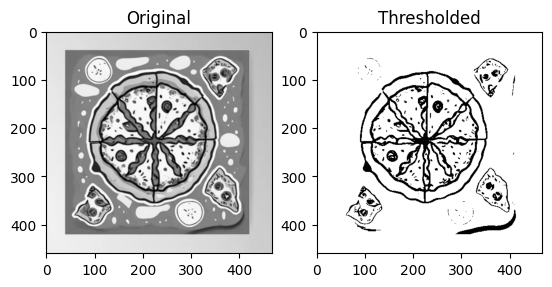

In [23]:
img_read=cv2.imread(img,cv2.IMREAD_GRAYSCALE)
retval,img_thresh=cv2.threshold(img_read,100,255,cv2.THRESH_BINARY)
plt.subplot(121);plt.imshow(img_read, cmap="gray");  plt.title("Original")
plt.subplot(122);plt.imshow(img_thresh, cmap="gray");plt.title("Thresholded")

print(img_thresh.shape)

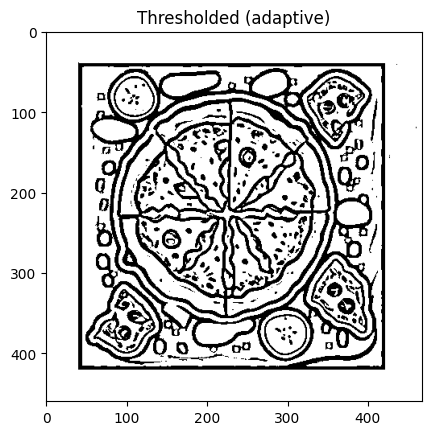

In [24]:
# now the code used adaptive thresholding 
img_thresh_adp = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)
plt.imshow(img_thresh_adp,  cmap="gray");  plt.title("Thresholded (adaptive)");


In [25]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)
    
    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [26]:
from zipfile import ZipFile
from urllib.request import urlretrieve
URL = r"https://www.dropbox.com/s/0oe92zziik5mwhf/opencv_bootcamp_assets_NB4.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB4.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)   

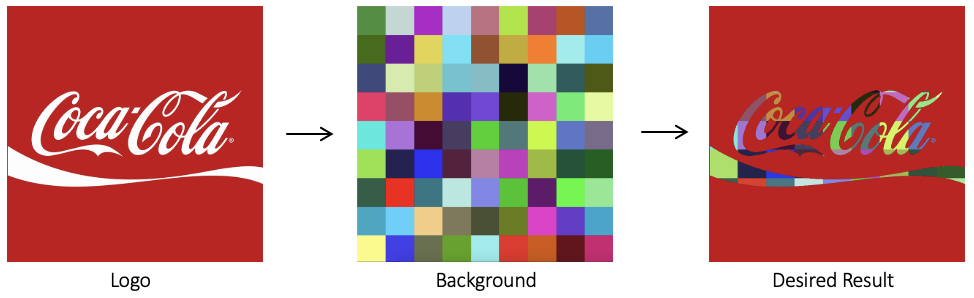

In [27]:
Image(filename='Logo_Manipulation.png')


(700, 700, 3)


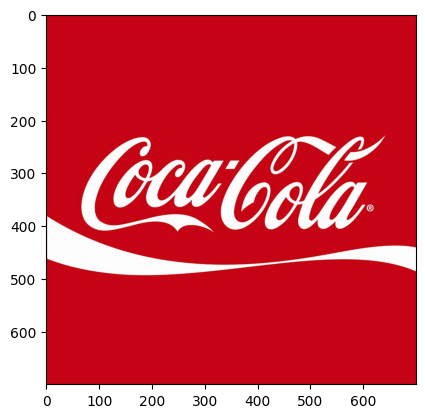

In [28]:
#read the foreground image 
img_bgr = cv2.imread("coca-cola-logo.png")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

print(img_rgb.shape)

logo_w = img_rgb.shape[0]
logo_h = img_rgb.shape[1]

(700, 700, 3)


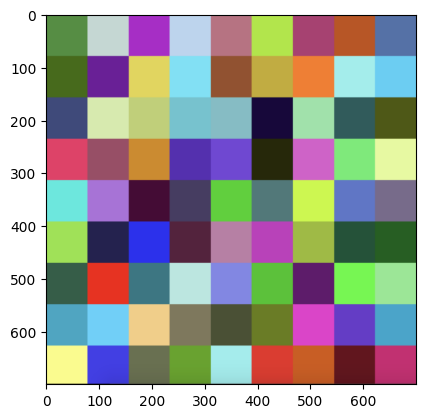

In [29]:
# Read in image of color cheackerboad background
img_background_bgr = cv2.imread("checkerboard_color.png")
img_background_rgb = cv2.cvtColor(img_background_bgr, cv2.COLOR_BGR2RGB)

# Set desired width (logo_w) and maintain image aspect ratio
aspect_ratio = logo_w / img_background_rgb.shape[1]
dim = (logo_w, int(img_background_rgb.shape[0] * aspect_ratio))

# Resize background image to sae size as logo image
img_background_rgb = cv2.resize(img_background_rgb, dim, interpolation=cv2.INTER_AREA)

plt.imshow(img_background_rgb)
print(img_background_rgb.shape)

(700, 700)


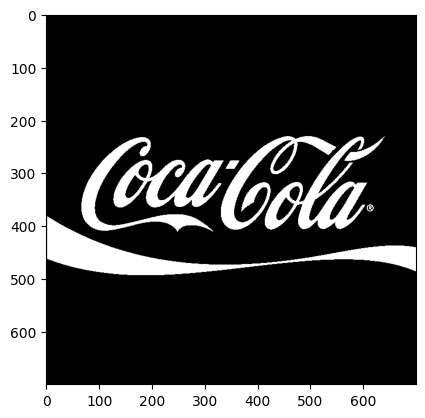

In [30]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Apply global thresholding to creat a binary mask of the logo
retval, img_mask = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(img_mask, cmap="gray")
print(img_mask.shape)

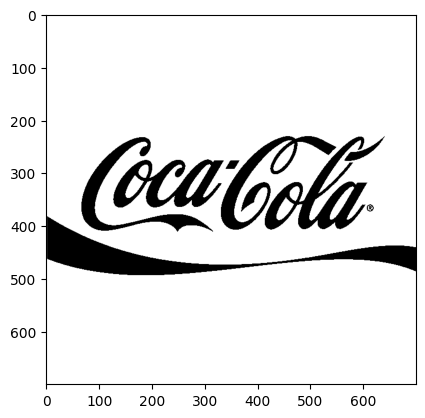

In [31]:
# Create an inverse mask
img_mask_inv = cv2.bitwise_not(img_mask)
plt.imshow(img_mask_inv, cmap="gray")

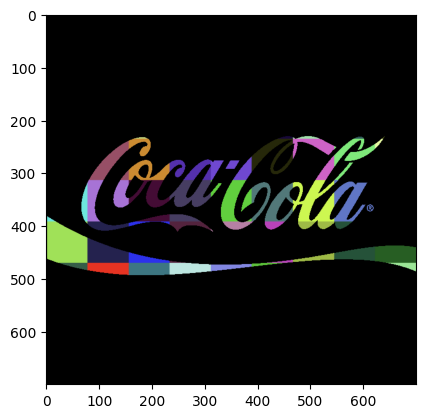

In [32]:
# Create colorful background "behind" the logo lettering
img_background = cv2.bitwise_and(img_background_rgb, img_background_rgb, mask=img_mask)
plt.imshow(img_background)

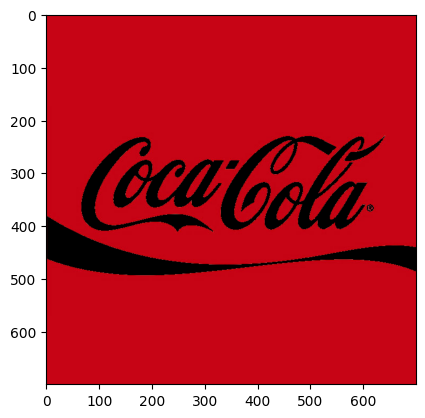

In [33]:
# Isolate foreground (red from original image) using the inverse mask
img_foreground = cv2.bitwise_and(img_rgb, img_rgb, mask=img_mask_inv)
plt.imshow(img_foreground)


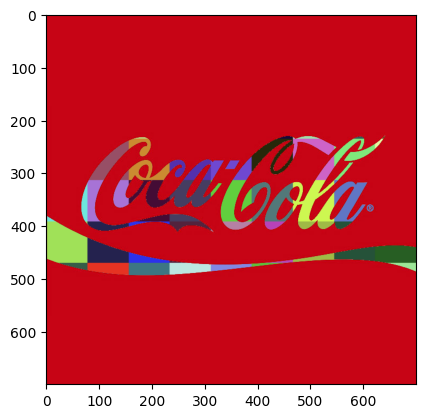

In [34]:
# Add the two previous results obtain the final result
result = cv2.add(img_background, img_foreground)
plt.imshow(result)


In [35]:
#change the channel to bgr and then save
cv2.imwrite("logo_final.png", result[:, :, ::-1])

True